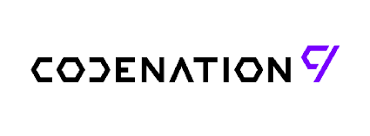

# Desafio 3 - Distribuições de Probabilidade
_____

### Base de Dados

Para a primeira parte do desafio será criado dados artificiais.

Na segunda parte a análise será do _data set_ **Pulsar Star** disponibilizado pelo Dr. Robert Lyon da Universidade de Manchester. 

Disponível em: https://archive.ics.uci.edu/ml/datasets/HTRU2.

**Descrição dos dados:**

Esse _data set_ consiste de 8 variáveis a respeito de 17898 observações de estrelas.

Essas estrelas foram consideradas "candidatas" a serem estrelas do tipo pulsar, que têm forte 
importância para os astrofísicos. 

Uma nona coluna do _data set_ especifica se a estrela é
realmente um pulsar (caso positivo, 1) ou não (caso negativo, 0).



### Objetivo

O objetivo deste desafio é explorar as principais funções sobre distribuições de probabilidade como PDF, CDF e quantis e as relações entre duas das principais distribuições: a normal e a binomial.

Este desafio está divido em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
    
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.


### Requisitos

Neste desafios vamos explorar:

- Probabilidade
- Estatística
- NumPy
- SciPy
- StatsModels
____

## _Setup_ geral

In [63]:
# importa as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
# configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

________
## Parte 1
__________

### _Setup_ da parte 1

In [4]:
# gerar o data set artificial com dados de uma amostra normal e uma binomial

# normal: loc é a média, scale é o desvio padrão (variância ao quadrado). X ~ N(20, 16) - média e variância
# binomial: n = número de vezes e p = probabilidade. X ~ Bin(100, 0.2) 

np.random.seed(42)
dataframe = pd.DataFrame({"normal": sct.norm.rvs(loc=20, scale=4, size=10000),  
                     "binomial": sct.binom.rvs(n=100, p=0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [6]:
# visualiza o dataframe 
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


#### Medidas de Tendência Central

- Amplitude

In [77]:
# amplitude da normal
print(f"min: {dataframe['normal'].min()}")
print(f"max: {dataframe['normal'].max()}")
print(f"amplitude: {dataframe['normal'].max() - dataframe['normal'].min() }")

min: 4.310398993526631
max: 35.70495082574531
amplitude: 31.394551832218674


In [76]:
# amplitude da binomial
print(f"min: {dataframe['binomial'].min()}")
print(f"max: {dataframe['binomial'].max()}")
print(f"amplitude: {dataframe['binomial'].max() - dataframe['binomial'].min() }")

min: 6
max: 36
amplitude: 30


- Média

In [80]:
print(f"Média Normal: {dataframe['normal'].mean()}")
print(f"Média Binomial: {dataframe['binomial'].mean()}")

Média Normal: 19.991456066526293
Média Binomial: 20.097


- Mediana

In [83]:
print(f"Mediana Normal: {dataframe['normal'].median()}")
print(f"Mediana Binomial: {dataframe['binomial'].median()}")

Mediana Normal: 19.98962009682849
Mediana Binomial: 20.0


#### Medidas de Posição

- Quartis

In [32]:
# gera os quartis (Q1, Q2, Q3) para a normal
q_norm = dataframe['normal'].quantile((0.25, 0.5, 0.75)).round(2)
q_norm

0.25    17.31
0.50    19.99
0.75    22.68
Name: normal, dtype: float64

In [61]:
# gera os quartis (Q1, Q2, Q3) para a binomial
q_binom = dataframe['binomial'].quantile((0.25, 0.5, 0.75))
q_binom

0.25    17.0
0.50    20.0
0.75    23.0
Name: binomial, dtype: float64

#### Média Amostral e Variância Amostral

In [89]:
# média amostral e variância amostral da normal
(dataframe['normal'].mean(), dataframe['normal'].var())

(19.991456066526293, 16.110987985368958)

In [90]:
# média amostral e variância amostral da binomial
(dataframe['binomial'].mean(), dataframe['binomial'].var())

(20.097, 16.331224122412277)

Apesar de ter criado a amostra a partir de uma distribuição com média exatamente 20 e variância 16 (populacional), a amostra gerada possui média amostral e variância amostral ligeiramente diferente.

#### Gráfico de Distribuição

Distribuição Normal

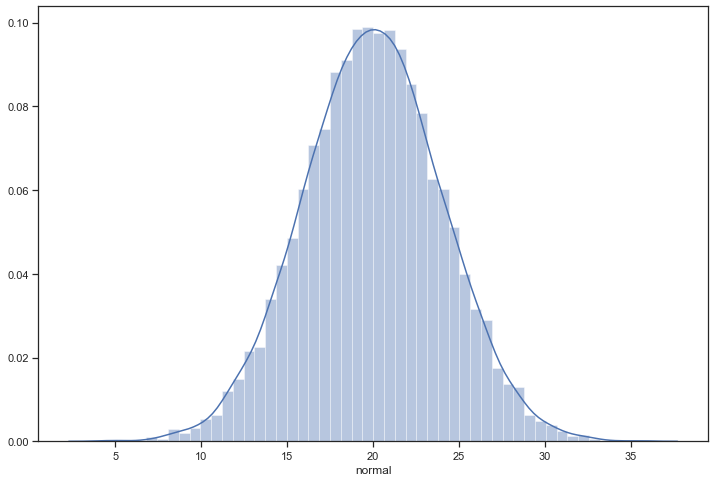

In [257]:
sns.distplot(dataframe['normal'])

Distribuição Binomial

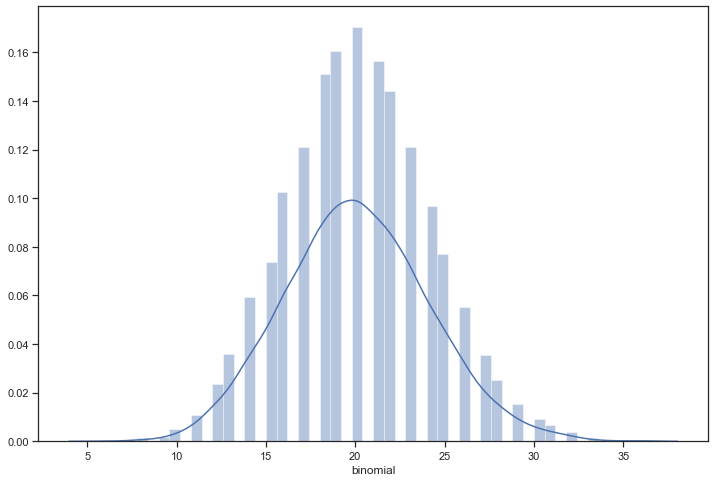

In [258]:
sns.distplot(dataframe['binomial'])

______
## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [163]:
def q1():
    # cálculo dos quantis
    q_norm = dataframe['normal'].quantile((0.25, 0.5, 0.75))
    q_binom = dataframe['binomial'].quantile((0.25, 0.5, 0.75))
    return tuple((q_norm - q_binom).round(3))  # o desafio espera uma tupla como resposta

In [180]:
q1()

(0.31, -0.01, -0.316)

**Você esperava valores dessa magnitude?**

Sim, pois a média, a variância, desvio-padrão são iguais nas duas distribuições. 
 
 **Normal: X ~ N(20, 16)**
 
 - Média = 20
 
 - Variância = 16
 
 - Desvio padrão = √16 = 4



  **Binomial: X ~ Bin(100, 0.2)**
 
 - Média = 100*0.2 = 20
 
 $\text{E}[X] = np$
 
 - Variância = 100*0.2(1-0.2) = 16

$\text{Var}[X] = np(1 - p) = npq$


- Desvio padrão = √16 = 4

**Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?**

Neste caso o valor de "n" da distribuição binominal é grande o suficiente, fazendo com que a inclinação da distribuição não seja muito grande. Com isso, ocorre uma aproximação da binomial que é dada pela distribuição normal $\text {N} (np, \, np (1-p))$.

Note que a média ($\mu = np$) e a variância ($\sigma^{2} = np(1 - p)$) da distribuição normal são exatamente iguais à média e variância da distribuição binomial, respectivamente.

Dessa forma, temos que a função binomial aproximada da normal é X ~ N(20,16), que é igual a distribuição normal gerada X ~ N(20, 16).

Existem várias regras para decidir se "n" é grande o suficiente, uma delas é que:

- Seja 𝑛≥20 e de preferência que  𝑝  não esteja nem muito próximo de 0 nem de 1. 

Nesse exemplo, temos que ambas condições são verdadeiras n = 100 e p = 0.2.


## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [190]:
def q2():
    # distribuição acumulada empírica
    ecdf = ECDF(dataframe['normal']) 
    
    # média e desvio_padrão amostral
    std1_positive = ecdf(dataframe['normal'].mean() + dataframe['normal'].std()) 
    std1_negative = ecdf(dataframe['normal'].mean() - dataframe['normal'].std())
    
    return float(round((std1_positive - std1_negative),3))  # o desafio espera um float como resposta

In [191]:
q2()

0.684

**Esse valor se aproxima do esperado teórico?**

Sim se aproxima, pois numa distribuição normal as probabilidades conhecidas, são:
  * A probabilidade de $X$ assumir valores entre $\mu - \sigma$ e $\mu + \sigma$ é de 68.27%.
  * A probabilidade de $X$ assumir valores entre $\mu - 2\sigma$ e $\mu + 2\sigma$ é de 95.45%.
  * A probabilidade de $X$ assumir valores entre $\mu - 3\sigma$ e $\mu + 3\sigma$ é de 99.73%.
  

**Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.**

Para a probabilidade de X assumir: $[\bar{x} - 2s, \bar{x} + 2s]$

In [192]:
# distribuição acumulada empírica
ecdf = ECDF(dataframe['normal']) 

# média e desvio_padrão amostral
std2_positive = ecdf(dataframe['normal'].mean() + 2*(dataframe['normal'].std())) 
std2_negative = ecdf(dataframe['normal'].mean() - 2*(dataframe['normal'].std()))


# calculo da probabilidade 
prob_2_std = float(round((std2_positive - std2_negative),3))
prob_2_std

0.954

Para a probabilidade de X assumir :$[\bar{x} - 3s, \bar{x} + 3s]$.

In [193]:
# distribuição acumulada empírica
ecdf = ECDF(dataframe['normal']) 

# média e desvio_padrão amostral
std3_positive = ecdf(dataframe['normal'].mean() + 3*(dataframe['normal'].std())) 
std3_negative = ecdf(dataframe['normal'].mean() - 3*(dataframe['normal'].std()))

# calculo da probabilidade 
prob_3_std = float(round((std3_positive - std3_negative),3))
prob_3_std

0.997

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [272]:
def q3():
    mv_norm = np.array([dataframe['normal'].mean(), dataframe['normal'].var()])
    mv_binom = np.array([dataframe['binomial'].mean(), dataframe['binomial'].var()])
    return tuple((mv_binom - mv_norm).round(3))

In [273]:
q3()

(0.106, 0.22)

**Você esperava valores dessa magnitude?**

Sim, pois a maior parte das funções disponíveis para a distribuição normal também estão disponível para a distribuição binomial. Logo, com a aproximação da binomial pela normal as médias e as variâncias seriam próximas. 

**Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?**

- Aumentar $n$ para 200.

In [214]:
# novo dataframe alterando o n=200
np.random.seed(42)
dataframe_binom = pd.DataFrame({"normal": sct.norm.rvs(loc=20, scale=4, size=10000),  
                     "binomial": sct.binom.rvs(n=200, p=0.2, size=10000)})

In [215]:
dataframe_binom.head()

,normal,binomial
0,21.986857,46
1,19.446943,41
2,22.590754,39
3,26.092119,41
4,19.063387,40


In [220]:
mv_norm2 = np.array([dataframe_binom['normal'].mean(), dataframe_binom['normal'].var()])
mv_binom2 = np.array([dataframe_binom['binomial'].mean(), dataframe_binom['binomial'].var()])
result = tuple((mv_norm2 - mv_binom2).round(3))
print(f'Normal {mv_norm2}')
print(f'Binomial {mv_binom2}')
print(f'Diferença {result}')

Normal [19.991 16.111]
Binomial [39.969 31.628]
Diferença (-19.977, -15.517)


Aumentando $n$ para 200, com isso a média e a variância também irão aumentar. Com n maior, logo teremos uma maior quantidade de resultados 1 (sucesso) em nossa distribuição binomial, achatando um pouco a curva. 

Variância: $\text{Var}[X] = np(1 - p) = npq$

Média: $\text{E}[X] = np$

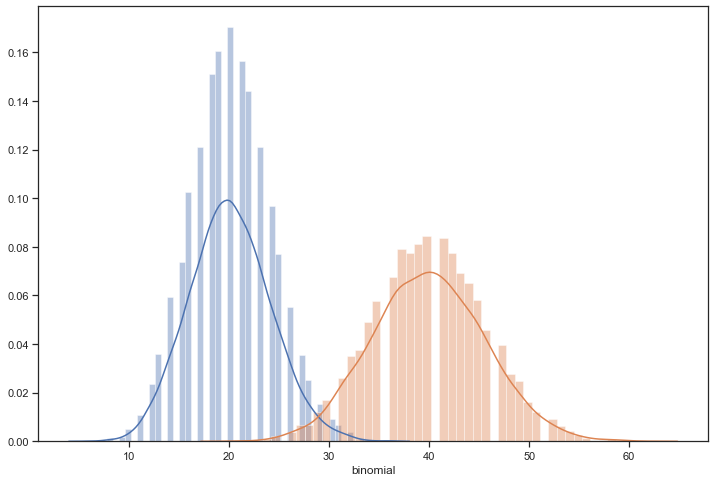

In [255]:
sns.distplot(dataframe['binomial'])
sns.distplot(dataframe_binom['binomial'])

- Reduzir $n$ para 50.

In [259]:
# novo dataframe alterando o n=50
np.random.seed(42)
dataframe_binom2 = pd.DataFrame({"normal": sct.norm.rvs(loc=20, scale=4, size=10000),  
                     "binomial": sct.binom.rvs(n=50, p=0.2, size=10000)})

In [260]:
mv_norm3 = np.array([dataframe_binom2['normal'].mean(), dataframe_binom2['normal'].var()])
mv_binom3 = np.array([dataframe_binom2['binomial'].mean(), dataframe_binom2['binomial'].var()])
result = tuple((mv_norm3 - mv_binom3).round(3))
print(f'Normal {mv_norm3}')
print(f'Binomial {mv_binom3}')
print(f'Diferença {result}')

Normal [19.991 16.111]
Binomial [10.07   8.141]
Diferença (9.922, 7.97)


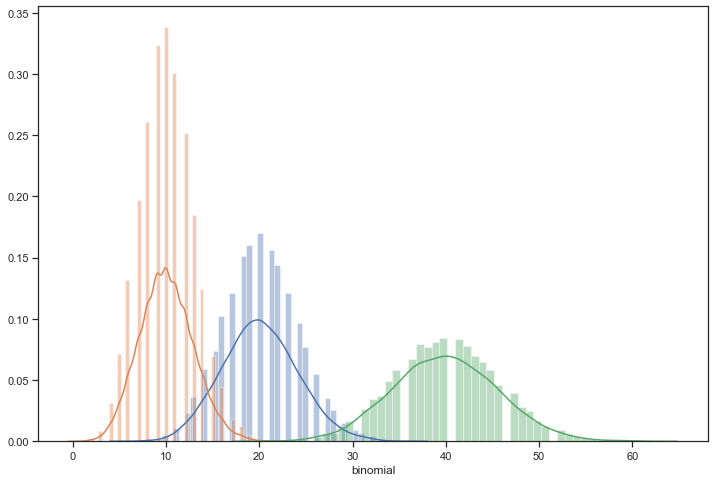

In [262]:
sns.distplot(dataframe['binomial'])
sns.distplot(dataframe_binom2['binomial'])
sns.distplot(dataframe_binom['binomial'])

Aumentando $n$ para 50, com isso a média e a variância também irão reduzir. Com n menor, logo teremos uma menor quantidade de resultados 1 (sucesso) em nossa distribuição binomial, deixando curva com pico mais alto . 

_________
## Parte 2
________

### _Setup_ da parte 2

In [264]:
# carrega o dataframe 
stars = pd.read_csv("pulsar_stars.csv")

# renomeia as colunas para o desafio
stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

# cria a coluna target
stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [265]:
# visualiza os dados
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,False
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False


In [276]:
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [299]:
# verifica a quantidade de estrela que é pulsar e as que não são pulsar
print('Não Pulsar', len(stars.target == 0))
print('Pulsar', len(stars.target == 1))

Não Pulsar 17898
Pulsar 17898


In [300]:
nostars = stars.query("target == 0")['mean_profile']
nostars

0        140.562500
1        102.507812
2        103.015625
3        136.750000
4         88.726562
            ...    
17893    136.429688
17894    122.554688
17895    119.335938
17896    114.507812
17897     57.062500
Name: mean_profile, Length: 16259, dtype: float64

In [301]:
nostars.describe()

count    16259.000000
mean       116.562726
std         17.475932
min         17.210938
25%        105.253906
50%        117.257812
75%        128.285156
max        192.617188
Name: mean_profile, dtype: float64

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [266]:
def q4():
    false_pulsar_mean_profile_standardized = sct.zscore(stars.query("target == 0")['mean_profile'])
    quartis = sct.norm.ppf([0.8, 0.90, 0.95])
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    return tuple((ecdf([quartis][0]).round(3)))

In [267]:
q4()

(0.806, 0.911, 0.959)

**Os valores encontrados fazem sentido?**

Sim, pois foi padronizado os valores de mean_profile para ter média 0 e variância 1, que é o mesmo que uma distribuição normal padrão (0,1).

A distribuição de Z é Normal(0;1), logo verificando a tabela z da Distribuição Normal Padrão Acumulada, temos que: 

- Para o quartil de 80% o valor mais próximo é 0,7995. 

   O início da linha é 0,8 e o topo da coluna é 0,04. 

   Isso corresponde a z = 0,84.

- Para o quartil de 90% o valor mais próximo é 0,8997. 

  O início da linha é 1,2 e o topo da coluna é 0,08. 
  
  Isso corresponde a z = 1,28.

- Para o quartil de 95% o valor mais próximo é 0,9495. 

  O início da linha é 1,6 e o topo da coluna é 0,04. 
  
  Isso corresponde a z = 1,64.

**O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?**

O escore padrão, ou escore z (zscore), representa o número de desvios padrão que separa uma variável aleatória x da média.

Isso quer dizer que ao padronizarmos a variável mean_profile usando o escores z, transformamos qualquer distribuição normal existente em nosso dados em uma distribuição normal padrão.

- A área acumulada está próxima de 0 para escores z próximos de –3,49.
- A área acumulada para z = 0 é 0,5000
- A área acumulada está próxima de 1 para escores z próximos de 3,49.


Quartis:  [0.842 1.282 1.645]


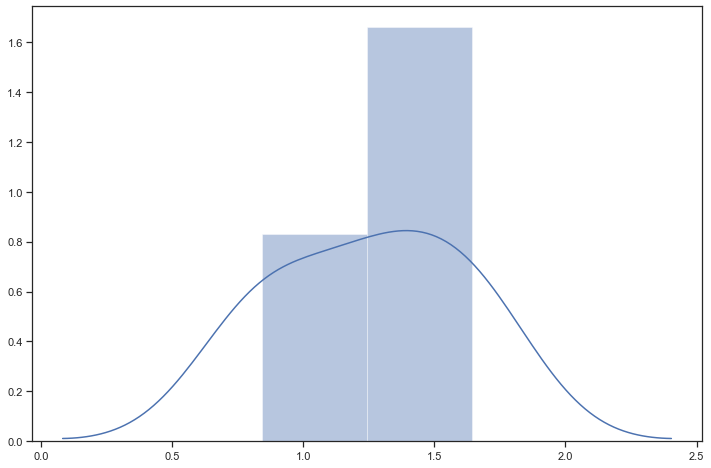

In [319]:
quartis = sct.norm.ppf([0.8, 0.90, 0.95])
print('Quartis: ', quartis)
sns.distplot(quartis)

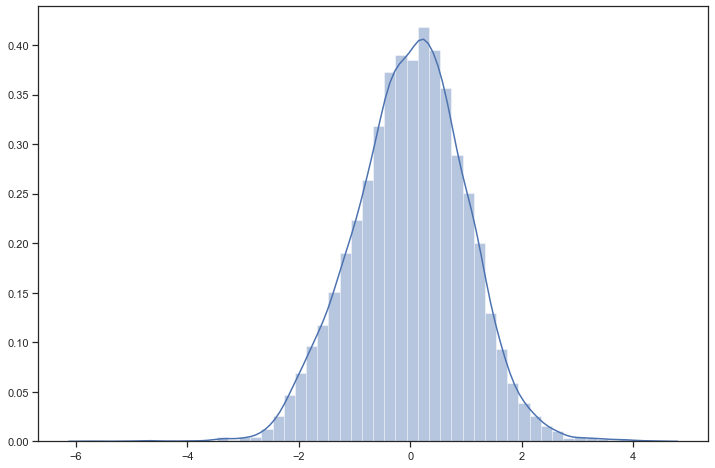

In [304]:
false_pulsar_mean_profile_standardized = sct.zscore(stars.query("target == 0")['mean_profile'])
sns.distplot(false_pulsar_mean_profile_standardized)

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [270]:
def q5():
    false_pulsar_mean_profile_standardized = sct.zscore(stars.query("target == 0")['mean_profile'])
    quartis = np.quantile(false_pulsar_mean_profile_standardized, [0.25, 0.50, 0.75])
    probabilidade_quartis = sct.norm.ppf([0.25, 0.50, 0.75])                                                              
    return tuple(np.round( (quartis - probabilidade_quartis), 3))

In [271]:
q5()

(0.027, 0.04, -0.004)

In [320]:
probabilidade_quartis = sct.norm.ppf([0.25, 0.50, 0.75])
probabilidade_quartis

array([-0.674,  0.   ,  0.674])

In [321]:
quartis = np.quantile(false_pulsar_mean_profile_standardized, [0.25, 0.50, 0.75])
quartis

array([-0.647,  0.04 ,  0.671])

**Os valores encontrados fazem sentido?**

Sim, como vimos anteriormente ao usarmos o escores z, transformamos qualquer distribuição normal numa distribuição normal padrão. Logo, os quartis da variável false_pulsar_mean_profile_standardized terá valores próximos dos quartis de uma distribuição normal padrão.

**O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?**
A distribuição de Z é Normal(0;1), logo a distribuição da variável possui uma distribuição normal padrão com média 0 e variância 1. 

>Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.

_________
## Conclusão
________

Exploramos as principais funções sobre distribuições de probabilidade como PDF, CDF e quantis e as relações entre duas das principais distribuições: a normal e a binomial.

Verificamos a aproximação da distribuição binomial pela normal, e com isso conseguimos obter as probabilidades que já são conhecidas pela normal.

Verificamos que podemos transformar qualquer distribuição normal numa distribuição normal padrão, logo os quartis da variável analisada será próximos dos quartis de uma distribuição normal padrão.

Muito aprendizado sobre os tipos de distribuição, alguns conceitos precisam ser estudados mais a fundo num segundo momento para consolidação do conhecimento.